In [27]:
%load_ext autoreload
%autoreload 2

from utils import load_data, clean_data, feature_engineer, create_test_train

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn import preprocessing

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import pandas as pd

In [28]:
# load data
pickle_raw = load_data(path = 'data/Pickleball - Sheet1.csv')

In [29]:
# clean data
pickle_clean = clean_data(pickle_raw)

In [43]:
# create features
pickle = feature_engineer(pickle_clean)

In [44]:
pickle.head()

1,Day,Park,Court,court_time,game_num,Player_A_1,Player_A_2,Paddle,Player_B_1,Player_B_2,Paddle2,game_length,becca_start,year,becca_win
2,Sunday,Plummer Park,6B,2024-04-07 14:00:00,1,Julianna,Alex,Straight,Becca,Justin,Bisexual,0 days 00:38:00,False,2023,True
3,Sunday,Plummer Park,6B,2024-04-07 14:00:00,2,Julianna,Alex,Straight,Becca,Stig,Bisexual,0 days 00:53:00,False,2023,False
4,Tuesday,Roxbury Tennis Club,2,2024-04-07 18:00:00,1,Julianna,nan,Straight,Becca,nan,Bisexual,0 days 00:26:00,True,2023,True
5,Tuesday,Roxbury Tennis Club,2,2024-04-07 18:00:00,2,Julianna,nan,Straight,Becca,nan,Bisexual,0 days 00:10:00,True,2023,True
6,Tuesday,Roxbury Tennis Club,2,2024-04-07 18:00:00,3,Julianna,nan,Straight,Becca,nan,Bisexual,0 days 00:21:00,True,2023,False


In [45]:
pickle_new = pickle

In [46]:
pickle_new['game_length_mins'] = pickle_new.game_length.dt.total_seconds()/60

In [47]:
pickle_new = pickle_new.drop('game_length', axis = 1)

In [48]:
pickle_new['hour'] = pickle_new.court_time.dt.hour

In [49]:
pickle_new.head()

1,Day,Park,Court,court_time,game_num,Player_A_1,Player_A_2,Paddle,Player_B_1,Player_B_2,Paddle2,becca_start,year,becca_win,game_length_mins,hour
2,Sunday,Plummer Park,6B,2024-04-07 14:00:00,1,Julianna,Alex,Straight,Becca,Justin,Bisexual,False,2023,True,38.0,14
3,Sunday,Plummer Park,6B,2024-04-07 14:00:00,2,Julianna,Alex,Straight,Becca,Stig,Bisexual,False,2023,False,53.0,14
4,Tuesday,Roxbury Tennis Club,2,2024-04-07 18:00:00,1,Julianna,nan,Straight,Becca,nan,Bisexual,True,2023,True,26.0,18
5,Tuesday,Roxbury Tennis Club,2,2024-04-07 18:00:00,2,Julianna,nan,Straight,Becca,nan,Bisexual,True,2023,True,10.0,18
6,Tuesday,Roxbury Tennis Club,2,2024-04-07 18:00:00,3,Julianna,nan,Straight,Becca,nan,Bisexual,True,2023,False,21.0,18


In [50]:
pickle_new = pickle.drop(['Player_A_1','Player_B_1','Paddle2','Court','game_length','court_time'], axis = 1)

In [51]:
pickle_new.head()

1,Day,Park,game_num,Player_A_2,Paddle,Player_B_2,becca_start,year,becca_win,game_length_mins
2,Sunday,Plummer Park,1,Alex,Straight,Justin,False,2023,True,38.0
3,Sunday,Plummer Park,2,Alex,Straight,Stig,False,2023,False,53.0
4,Tuesday,Roxbury Tennis Club,1,nan,Straight,nan,True,2023,True,26.0
5,Tuesday,Roxbury Tennis Club,2,nan,Straight,nan,True,2023,True,10.0
6,Tuesday,Roxbury Tennis Club,3,nan,Straight,nan,True,2023,False,21.0


In [67]:
pickle_dummies = pd.get_dummies(pickle_new)

In [72]:
X = pickle_dummies.drop('becca_win', axis=1)
y = pickle_dummies['becca_win']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [73]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5714285714285714


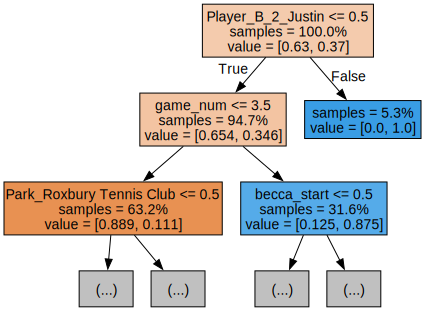

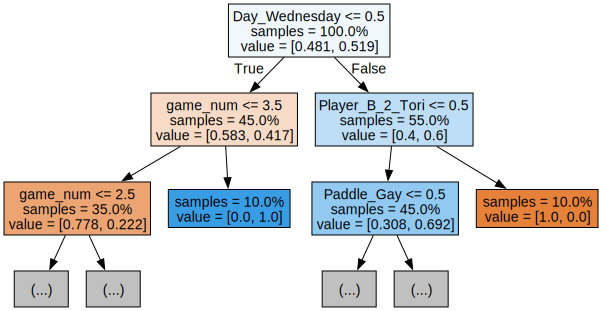

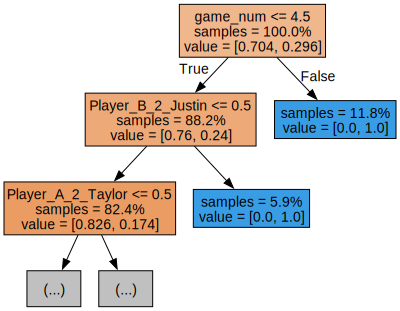

In [78]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [58]:
# create test/train data
X_train, X_test, y_train, y_test = create_test_train(pickle_new)